In [4]:
from datasets import load_dataset, load_from_disk, concatenate_datasets
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
list(range(655, 660))

[655, 656, 657, 658, 659]

In [6]:
trn_pth = [
        load_from_disk(Path('../data/hf_cashe')/ f"batch_{i}.parquet")
        for i in range(655, 660)
    ]

ds = concatenate_datasets(trn_pth)

In [7]:
#write a function that counts how long is the event
def count_event_length(event):
    event_lenth = len(event['time'])
    return {"event_length": event_lenth}

#write a function that performs batched counting
def count_event_length_batched(batch):
    event_lengths = []
    for i in batch['time']:
        event_lengths.append(len(i))
    return {"event_lengths": event_lengths}

#write a function that counts how many auxilary True values are in event
def count_auxilary_true(event):
    auxilary_true =[]
    for i in event['auxiliary']:
        auxilary_true.append(np.sum(np.array(i)))
    return {"auxilary_true_count": auxilary_true}

#write a function that gets first time of event
def get_first_time(event):
    first_time = []
    for i in event['time']:
        first_time.append(i[0])
    return {"first_time": first_time}


In [8]:
#ds = ds.map(count_event_length_batched, batch_size=1000,  batched=True, num_proc=8)
#ds = ds.map(count_auxilary_true, batch_size=1000,  batched=True, num_proc=8)
ds = ds.map(get_first_time, batch_size=1000,  batched=True, num_proc=8)

Map (num_proc=8):   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [11]:
#pd.DataFrame({"event_id": ds['event_id'], "aux_count": ds['auxilary_true_count']}).to_csv('aux.csv', index=False)
pd.DataFrame({"event_id": ds['event_id'], "first_time": ds['first_time']}).to_csv('first_time.csv', index=False)

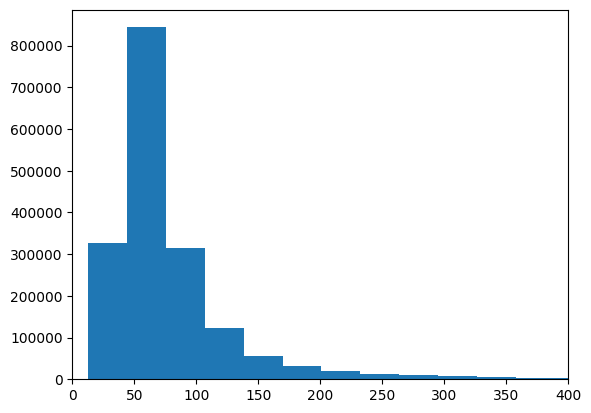

In [68]:
#plot a distribution of event lengths limit on x axis to 100
plt.hist(ds['event_lengths'][:1800000], bins=10000//2);
plt.xlim(0, 400);

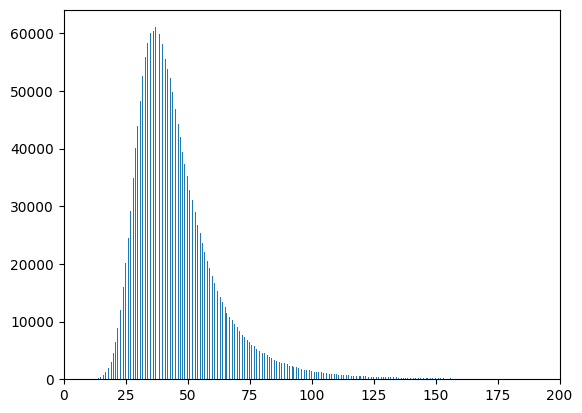

In [69]:
#plot a distribution of event lengths limit on x axis to 100
plt.hist(ds['auxilary_true_count'][:1800000], bins=1000);
plt.xlim(0, 200);

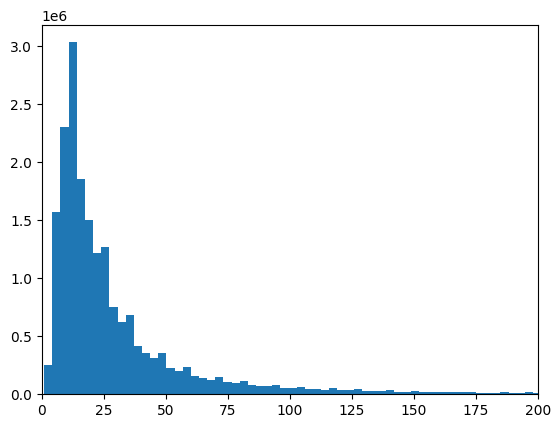

In [70]:
plt.hist(np.array(ds['event_lengths']) - np.array(ds['auxilary_true_count']), bins=100000//2);
plt.xlim(0, 200);

In [67]:
min(np.array(ds['event_lengths']) - np.array(ds['auxilary_true_count']))

1

In [17]:
min(ds['azimuth']), max(ds['azimuth'])

(6.436839548775502e-08, 6.283185215015747)

In [18]:
min(ds['zenith']), max(ds['zenith'])

(8.631674577710722e-05, 3.1415621360116672)